#### Tesseract 

In [66]:
import pytesseract
from PIL import Image

img = Image.open('/home/ubuntu/flask_app/ex1103/book.jpg')

text_tesseract = pytesseract.image_to_string(img, lang='kor')
print(text_tesseract)

 

 

22         실무에서 바로 사용하는 노하우
% 그래픽
디까인
가이드



#### ocr-space

In [68]:
import requests

api_key = "K84831605488957"
filename = "/home/ubuntu/flask_app/ex1103/book.jpg"

with open(filename, "rb") as f:
    response = requests.post(
        "https://api.ocr.space/parse/image",
        files={filename: f},
        data={"apikey": api_key, "language": "kor"}
    )

result = response.json()
# OCR 결과 추출
text_ocrspace = result['ParsedResults'][0]['ParsedText']
print(text_ocrspace)

보라 출판사
주,쮸2丫
실무에서 바로 사용하는 노하우
그래픽
디자인
가이드



#### pyMuPDF

In [78]:
import fitz  # PyMuPDF
from PIL import Image
import pytesseract
import io


def extract_text_from_pdf(pdf_path):
   doc = fitz.open(pdf_path)
   full_text = ""


   for page_num in range(len(doc)):
       page = doc.load_page(page_num)
       text = page.get_text()
       full_text += text


       # 이미지 추출
       image_list = page.get_images()
       for img_index, img in enumerate(image_list):
           xref = img[0]
           base_image = doc.extract_image(xref)
           image_bytes = base_image["image"]
           img_pil = Image.open(io.BytesIO(image_bytes))


           # OCR 수행하여 이미지 내 텍스트 추출
           img_text = pytesseract.image_to_string(img_pil, lang='kor')
           full_text += "\n[이미지 내 텍스트]\n" + img_text + "\n"


   return full_text


# 사용 예:
pdf_text = extract_text_from_pdf("/home/ubuntu/flask_app/ex1103/book.pdf")
print(pdf_text)


[이미지 내 텍스트]
 

 

22         실무에서 바로 사용하는 노하우
% 그래픽
디까인
가이드




#### Levenshtein 거리로 인식률 계산

In [79]:
import Levenshtein

def accuracy(original, ocr_text):
    distance = Levenshtein.distance(original, ocr_text)
    return max(0, 100 * (1 - distance / max(len(original), len(ocr_text))))

original_text = "보라 출판사\n실무에서 바로 사용하는 노하우\n그래픽\n디자인\n가이드"
tesseract_acc = accuracy(original_text, text_tesseract)
ocrspace_acc = accuracy(original_text, text_ocrspace)
pymupdf_acc = accuracy(original_text, pdf_text)

print(f"Tesseract: {tesseract_acc:.2f}%")
print(f"OCR.space: {ocrspace_acc:.2f}%")
print(f"PyMuPDF: {pymupdf_acc:.2f}%")


Tesseract: 57.14%
OCR.space: 72.92%
PyMuPDF: 46.03%


#### Matplotlib으로 그래프 시각화 

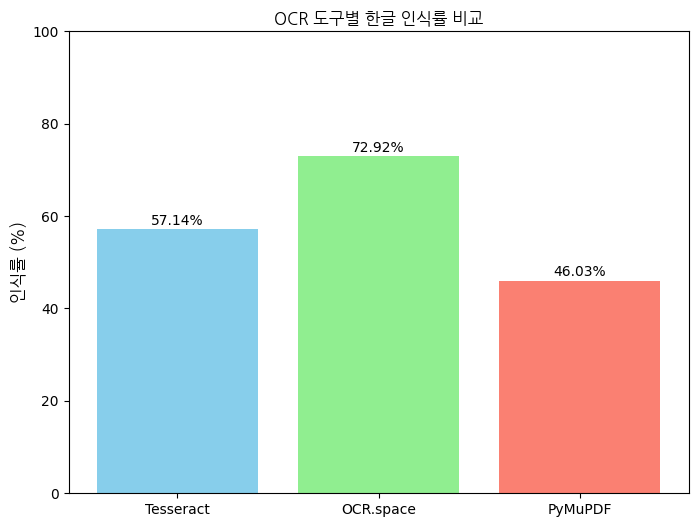

In [82]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

tools = ['Tesseract', 'OCR.space', 'PyMuPDF']
accuracies = [tesseract_acc, ocrspace_acc, pymupdf_acc]

font_path = '/home/ubuntu/flask_app/1103/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

plt.figure(figsize=(8, 6))
plt.bar(tools, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("인식률 (%)",fontproperties=font_prop)
plt.title("OCR 도구별 한글 인식률 비교",fontproperties=font_prop)
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()
